In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from exabiome.nn.loader import LazySeqDataset, train_test_loaders

In [2]:
path = 'ar122_r202.toy.input.h5'

## Open file

A few things to note:

- we are chunking data into 4kb chunks (i.e. `window=4096, step=4096`). 
- we are keeping the underlying HDF5 file open. (i.e. `keep_open=True`)
  - this means we cannot just pass this into a DataLoder with `num_workers > 0`
- we are preparing the data for a graph learning task (i.e. `graph=True`)
  - this means the attribute `node_ids` will be populated so we can map taxa IDs to
    their respective node in the tree graph
  
See `?LazySeqDataset` for documentation on other options.

In [3]:
dset = LazySeqDataset(path=path, window=4096, step=4096, keep_open=True, graph=True)

Let's look at some samples:

In [4]:
dset[0], dset[1], dset[-1], dset[-2]

((0, tensor([ 9,  9, 10,  ...,  9,  0,  9]), tensor(0), 0),
 (1, tensor([0, 0, 1,  ..., 0, 9, 0]), tensor(0), 0),
 (189005, tensor([ 1, 10, 10,  ...,  9,  0,  9]), tensor(165), 17219),
 (189004, tensor([10,  1,  1,  ...,  0,  9,  0]), tensor(165), 17219))

Each element returned by `__getitem__` is a tuple with the following elements:

0. the sample ID
1. the sample sequence
2. the sample label
   - If you used `graph=True` or `manifold=True`, this will species ID. If you used
   `classify=True`, this will be the ID of the taxonomic label specificed in `tgt_tax_lvl`
3. sequence ID
   - If sequences are chunked, this will be the ID for the sequence from which this
   sequence chunk was derived

## Get the graph representation of the tree

By default, a `scipy.sparse.csr_matrix` is returned, so you easily convert to your preferred sparse matrix 

In [5]:
csr_graph = dset.get_graph()

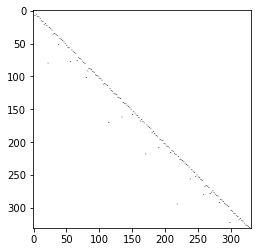

In [6]:
plt.imshow(csr_graph.todense() != 0, cmap='Greys')

# Get DataLoaders

- we are asking for DataLoaders to collate data for graph learning. 
  - this means that the label that gets returned by `__getitem__` will be a node ID into the tree graph
 
See `?train_test_loaders` for documentation on other options

In [7]:
tr, va, te = train_test_loaders(dset, batch_size=32)

Let's look at a single batch:

In [8]:
for batch in tr:
    print(batch)
    break

(tensor([ 88975, 142399,  34183, 151616,  79662,  33909,  63421, 127239,  80309,
         93626,  61152, 147765,  93140,   7757, 180133,  98488,  40924,  35036,
        173823,  74576, 106471, 110431, 131430,  81946,  40436,   5777, 170899,
         37758,  58083,  67648, 182802, 140442]), tensor([[ 9,  1, 10,  ...,  0, 10, 10],
        [10,  1, 10,  ...,  0, 10, 10],
        [ 9,  0, 10,  ...,  0,  9,  9],
        ...,
        [ 0,  9,  0,  ...,  0,  0,  9],
        [ 1,  9,  1,  ...,  0,  0,  0],
        [ 9, 10,  9,  ...,  0,  0,  0]]), tensor([289,  63, 229,  84, 199, 229, 124, 137,  11,   0,  96,  54, 284,  61,
         45,  32,  24,  41, 243, 195, 129,  47,  49, 306,  24,  82, 325, 115,
        237, 165, 265, 118]), tensor([4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        2577, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 2372, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 1584, 4096, 2707, 1263]), tensor([ 7118, 12212,  2415, 13311,  6728,  2408, 